In [24]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
%autoreload
from npyx import *

# Load Spike Data

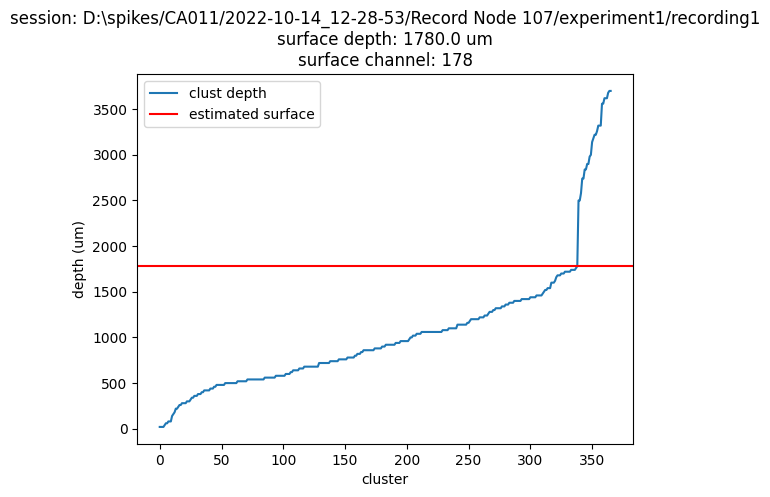

In [26]:
computer_name = os.environ['COMPUTERNAME']
if 'DESKTOP-HT3RNG1' in computer_name:
    data_path = 'D:\spikes'
else:
    data_path = 'X:\data\mpfc-pilot'
#dp = f'{data_path}/CA011/2022-10-13_12-51-32/Record Node 107/experiment1/recording1'
dp = f'{data_path}/CA011/2022-10-14_12-28-53/Record Node 107/experiment1/recording1'
clust = get_units(dp)
clust_info = get_units_info(dp)

# approximate brain surface by looking at where the units are
good_unit_depth = clust_info[clust_info.KSLabel=='good'].depth
surface_depth = np.sort(good_unit_depth)[np.argwhere(np.diff(good_unit_depth)>100)[0][0]]
plt.plot(np.sort(good_unit_depth),label='clust depth')
plt.axhline(surface_depth,color='r',label='estimated surface')
plt.xlabel('cluster')
plt.ylabel('depth (um)')
plt.legend()

# adjust depth to be relative to brain surface
clust_info['adj_depth'] = -(clust_info.depth - surface_depth)

# get channel of surface depth
channel_map = chan_map(dp, y_orig='tip', probe_version='1.0')
surface_channel = np.abs(np.vstack(channel_map)[:,2] - surface_depth).argmin()
plt.title(f'session: {dp}\nsurface depth: {surface_depth} um\nsurface channel: {surface_channel}');

In [27]:
# extract good cells
good = (clust_info.adj_depth > 0) & (clust_info.KSLabel == 'good') & (clust_info.fr > 1)
good_cells = clust_info.cluster_id[good].values
good_cells_info = clust_info.loc[good]
good_cells_info = good_cells_info.reset_index()
fs = 30e3
#spks = [s/fs/60 for s in spks]
len(good_cells)

165

True
True
plotting unit 0...
plotting unit 1...
plotting unit 2...
plotting spike 0/1...
plotting unit 3...
plotting unit 4...
plotting unit 5...
plotting unit 6...
plotting unit 7...
plotting unit 8...
plotting spike 0/1...
plotting unit 9...
plotting unit 10...
plotting unit 11...
plotting unit 12...
plotting spike 0/1...
plotting unit 13...
plotting unit 14...
plotting unit 15...
plotting unit 16...
plotting unit 17...
plotting unit 18...
plotting unit 19...
plotting unit 20...
plotting unit 21...
plotting unit 22...
plotting spike 0/2...
plotting spike 1/2...
plotting unit 23...
plotting unit 25...
plotting unit 26...
plotting unit 27...
plotting spike 0/2...
plotting spike 1/2...
plotting unit 28...
plotting spike 0/2...
plotting spike 1/2...
plotting unit 29...
plotting unit 30...
plotting unit 31...
plotting unit 36...
plotting unit 37...
plotting spike 0/1...
plotting unit 39...
plotting unit 41...
plotting unit 42...
plotting unit 43...
plotting spike 0/2...
plotting spike 1/2

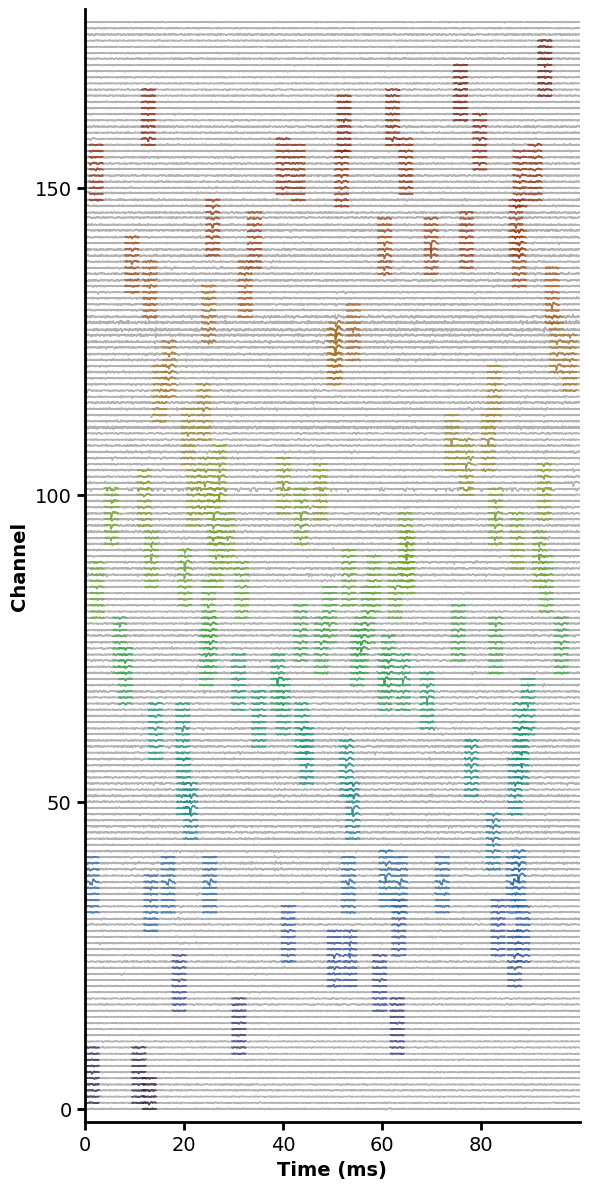

In [28]:
from matplotlib import colors, cm
                        
# get units to plot
units = clust_info

# colormap by peak channel
norm = colors.Normalize(vmin=0, vmax=surface_channel)
cmap = cm.turbo
m = cm.ScalarMappable(norm=norm, cmap=cmap)
color_map = m.to_rgba(clust_info.ch) / 1.5

# raw data are whitened, high-pass filtered and median-subtracted by default - parameters are explicit below
fig = plot_raw_units(dp, times=[902.05,902.15], units = units.cluster_id, channels=range(0,surface_channel),
                     colors = color_map, lw=1, offset=300, figsize=(6,12), Nchan_plot=10,
                     med_sub=1, whiten=1, hpfilt=1, bg_alpha=0.3);
fig.savefig('./results/raw_units.pdf', bbox_inches = 'tight')

True
True
plotting unit 0...
plotting unit 1...
plotting unit 2...
plotting unit 3...
plotting unit 4...
plotting unit 5...
plotting unit 6...
plotting unit 7...
plotting unit 8...
plotting unit 9...
plotting unit 10...
plotting unit 11...
plotting unit 12...
plotting unit 13...
plotting unit 14...
plotting unit 15...
plotting unit 16...
plotting unit 17...
plotting unit 18...
plotting unit 19...
plotting unit 20...
plotting unit 21...
plotting unit 22...
plotting unit 23...
plotting unit 25...
plotting unit 26...
plotting unit 27...
plotting unit 28...
plotting unit 29...
plotting unit 30...
plotting unit 31...
plotting unit 36...
plotting unit 37...
plotting unit 39...
plotting unit 41...
plotting unit 42...
plotting unit 43...
plotting unit 44...
plotting unit 45...
plotting unit 46...
plotting unit 47...
plotting unit 48...
plotting unit 49...
plotting unit 50...
plotting unit 51...
plotting unit 52...
plotting unit 53...
plotting unit 54...
plotting unit 55...
plotting unit 56...


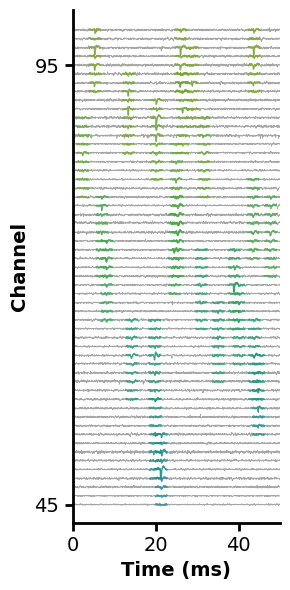

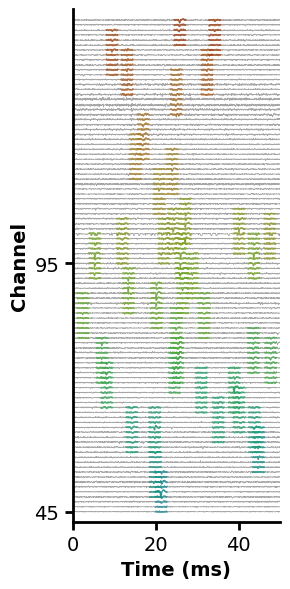

In [29]:
fig = plot_raw_units(dp, times=[902.05,902.1], units = units.cluster_id, channels=range(45,100),
               colors = color_map, lw=0.5, offset=300, figsize=(3,6), Nchan_plot=10,
               med_sub=1, whiten=1, hpfilt=1, bg_alpha=0.35);
fig.savefig('./results/raw_units_45-100.pdf', bbox_inches = 'tight')

fig = plot_raw_units(dp, times=[902.05,902.1], units = units.cluster_id, channels=range(45,145),
               colors = color_map, lw=0.5, offset=300, figsize=(3,6), Nchan_plot=10,
               med_sub=1, whiten=1, hpfilt=1, bg_alpha=0.35);
fig.savefig('./results/raw_units_45-145.pdf', bbox_inches = 'tight')

## Plot waveforms

meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


130


meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


131


meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


154


meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


22


meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


79


meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


104


meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


10


meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


89


meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


0


meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


90


meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


122


meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


52


meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


99


meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


112


meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


91


meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


84


meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


157


meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


24


meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


117


meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


69


meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


53


meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


50


meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


58


meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


31


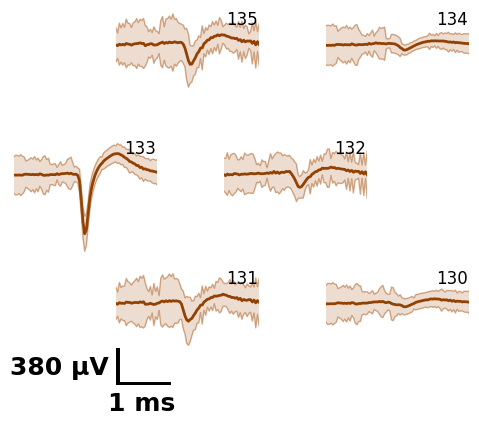

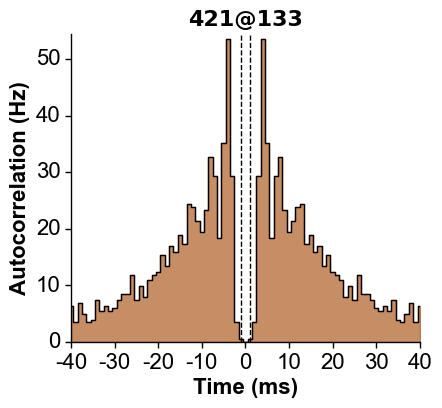

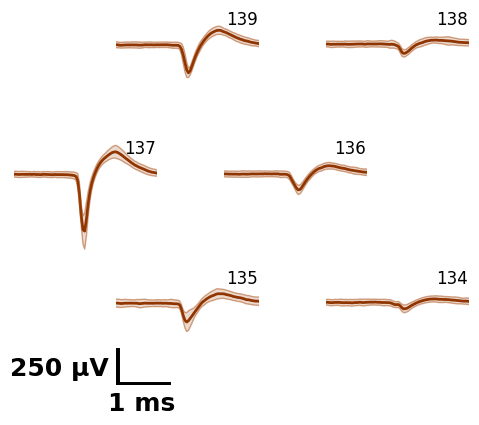

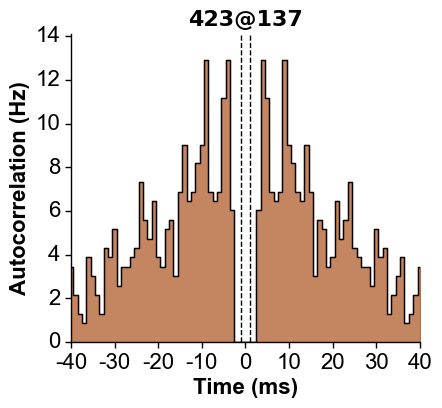

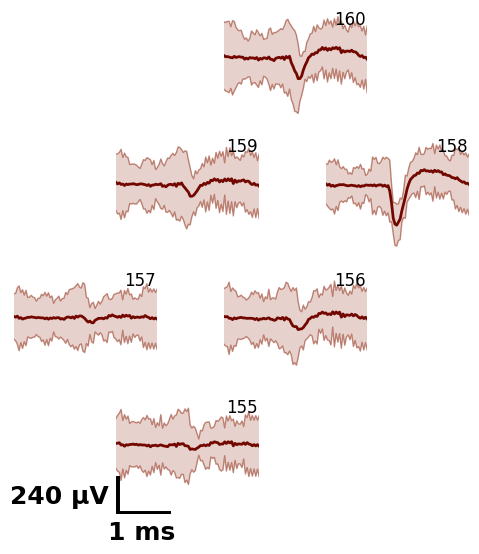

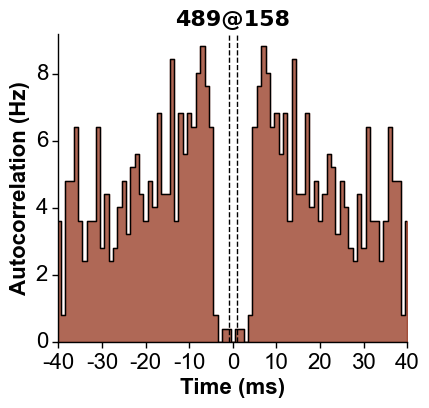

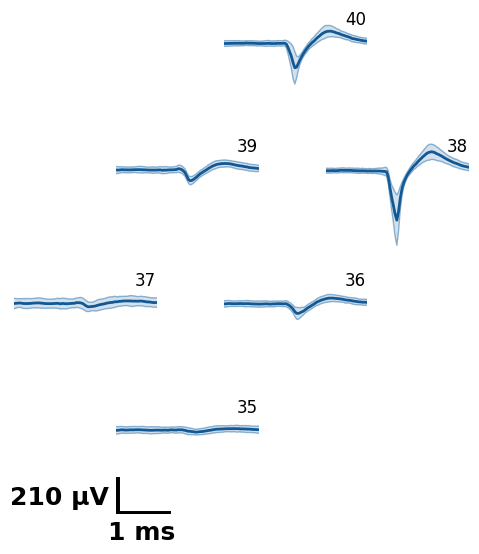

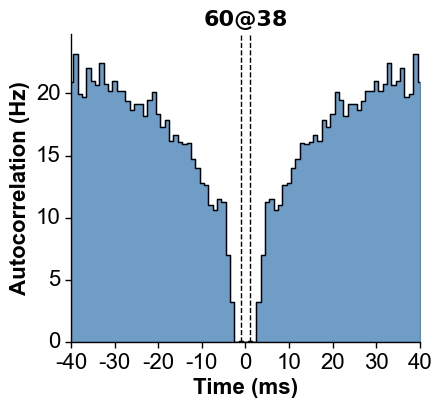

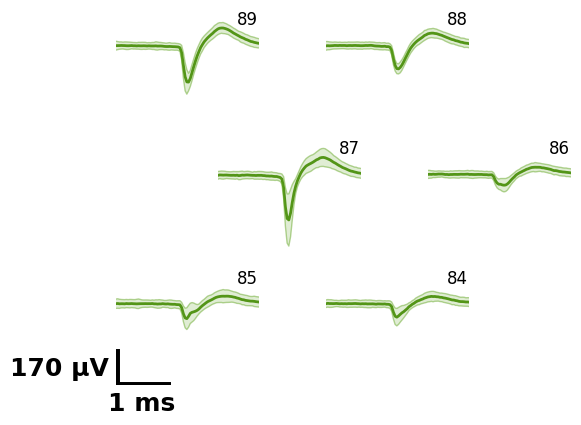

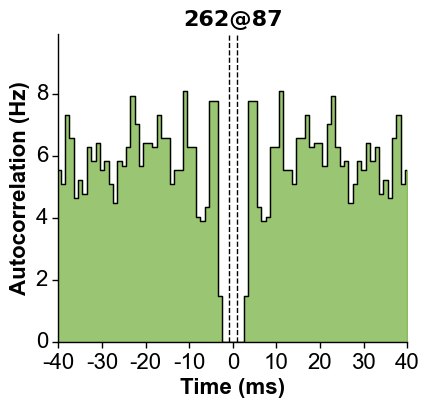

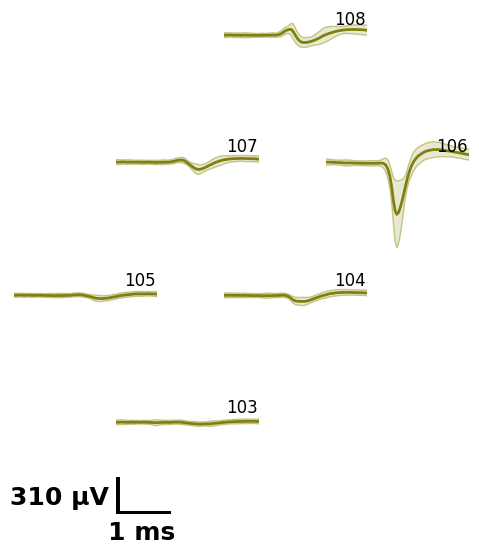

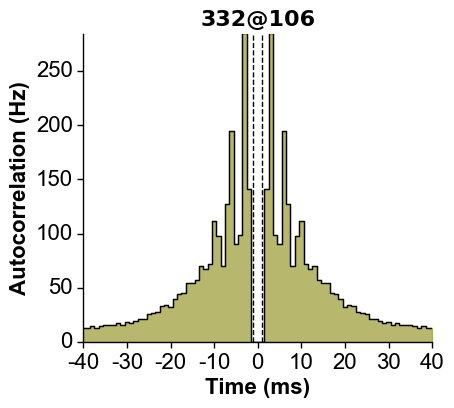

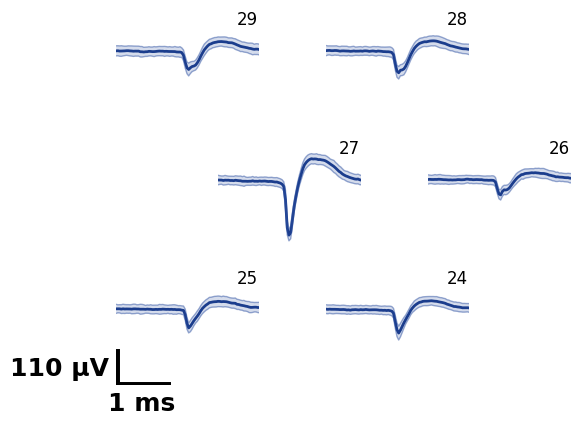

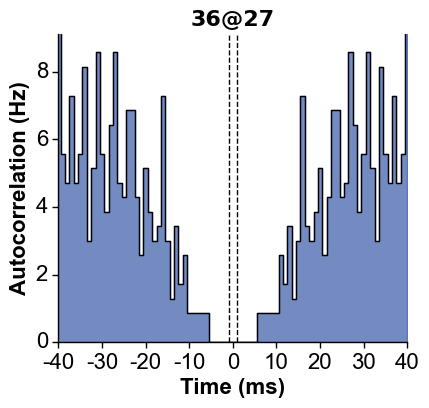

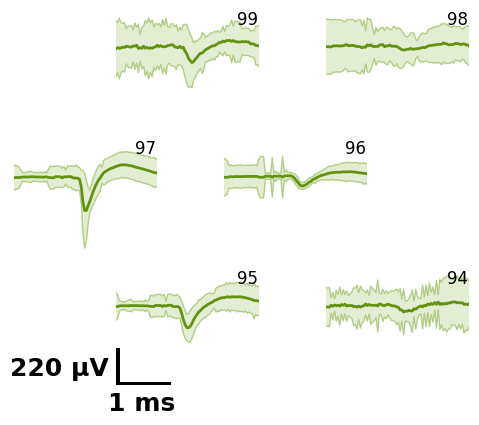

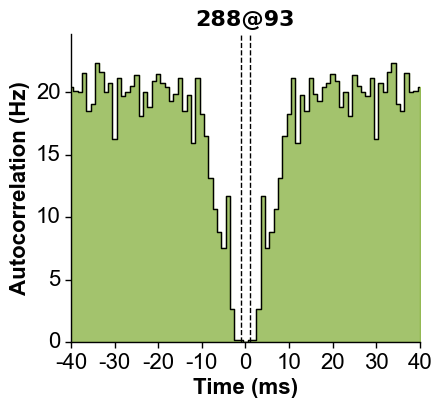

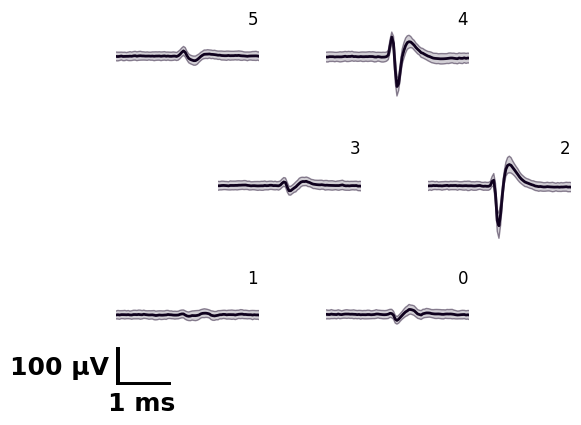

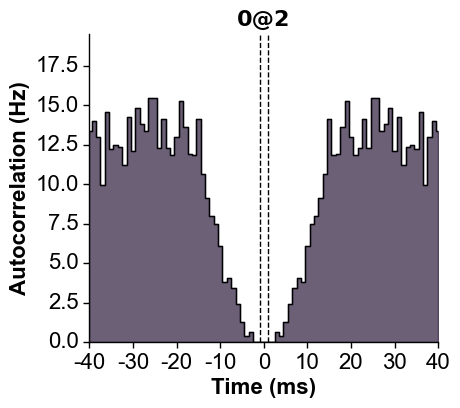

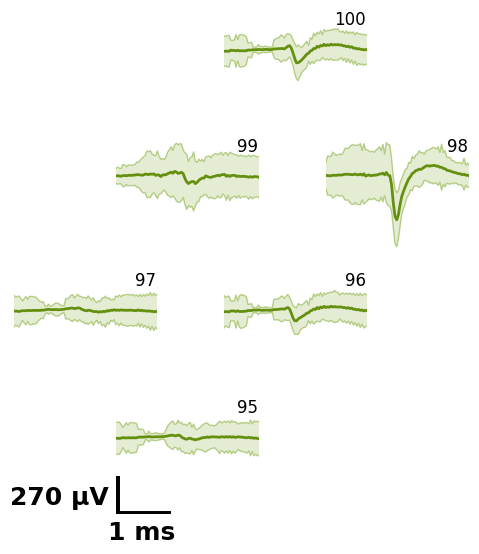

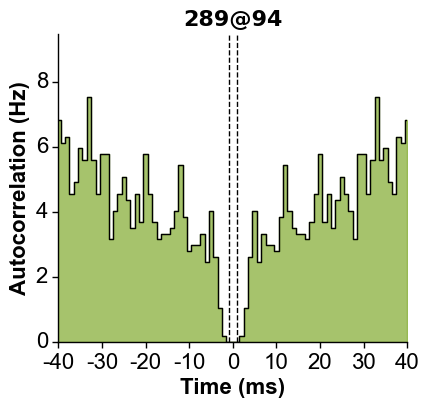

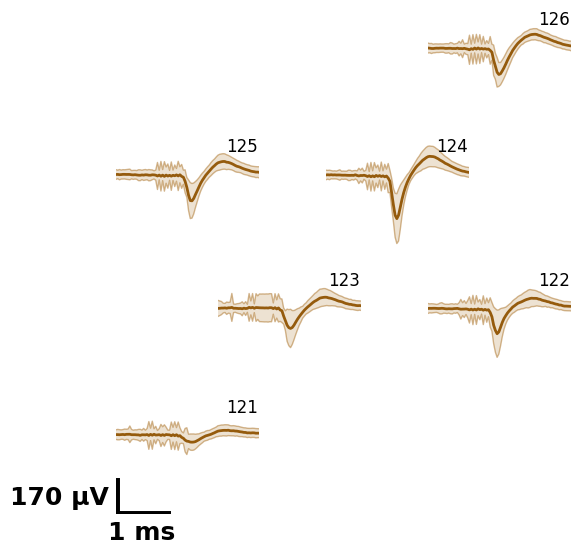

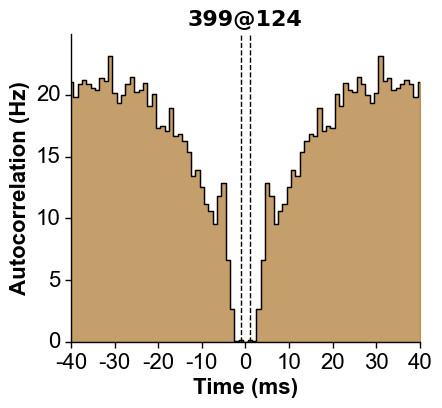

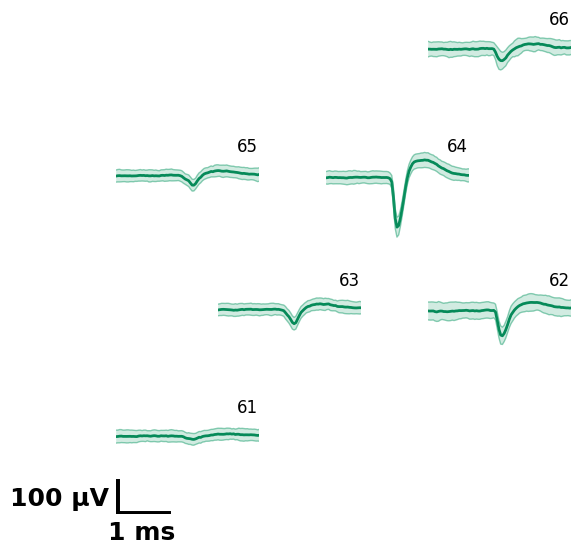

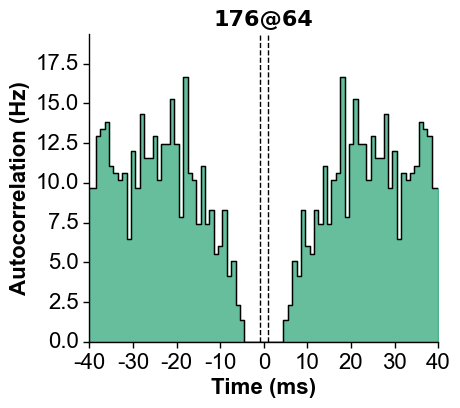

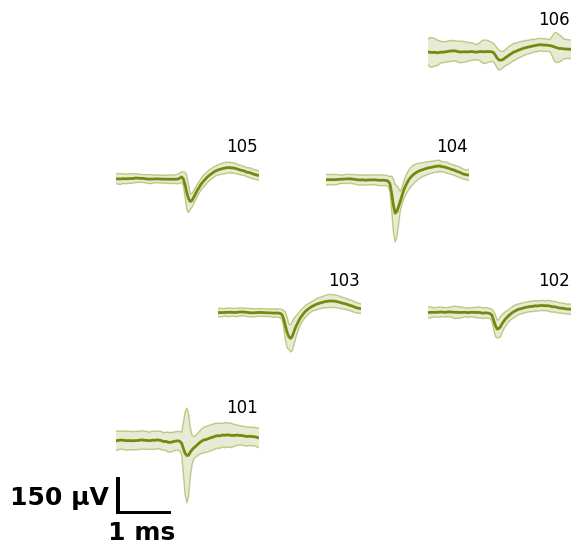

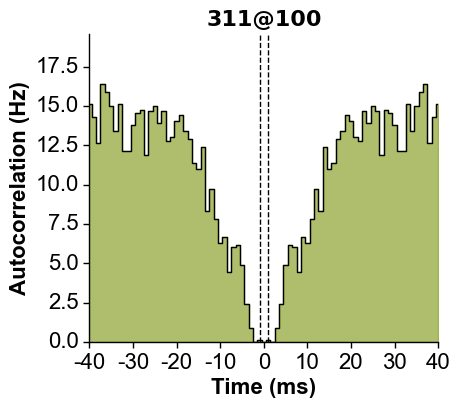

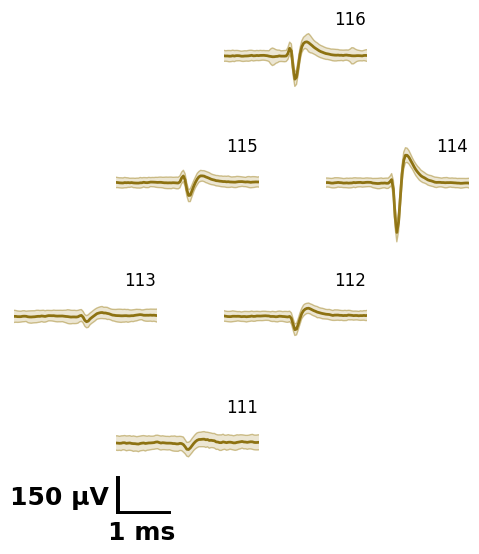

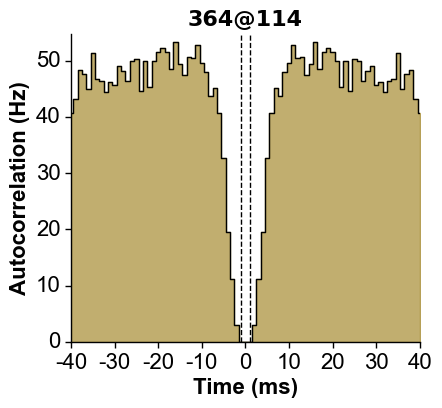

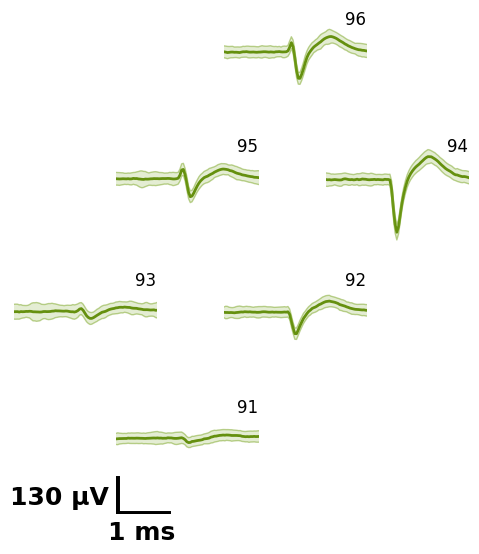

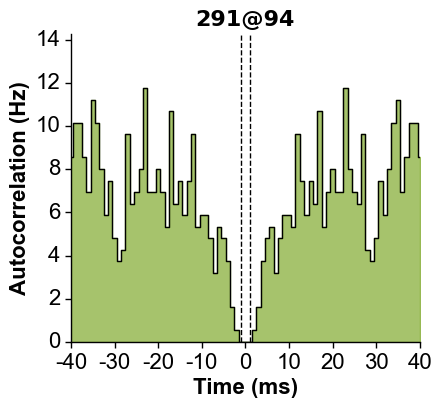

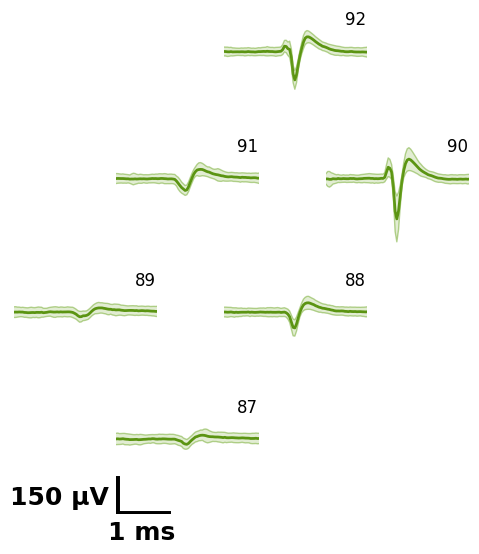

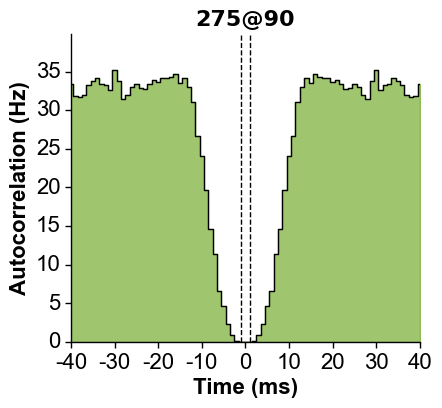

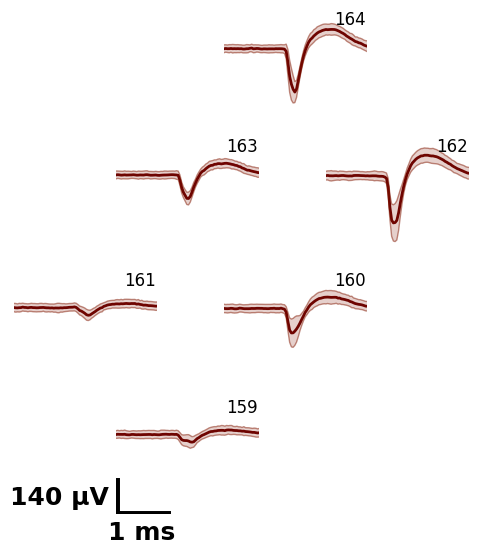

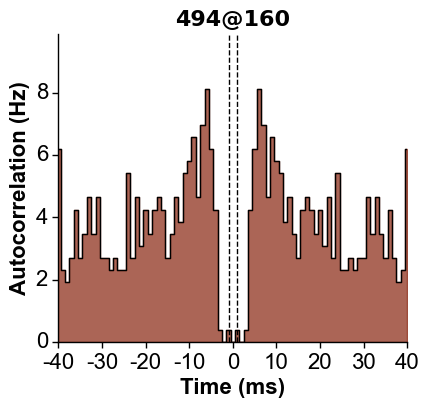

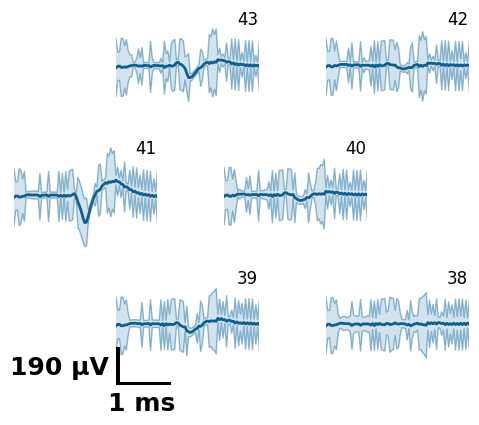

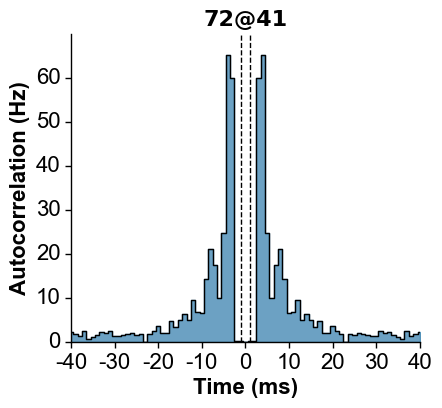

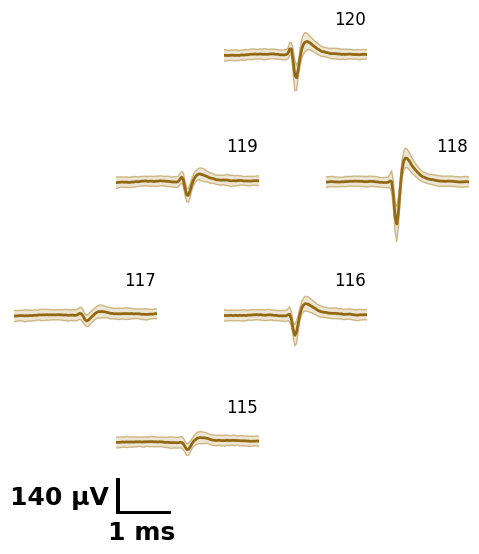

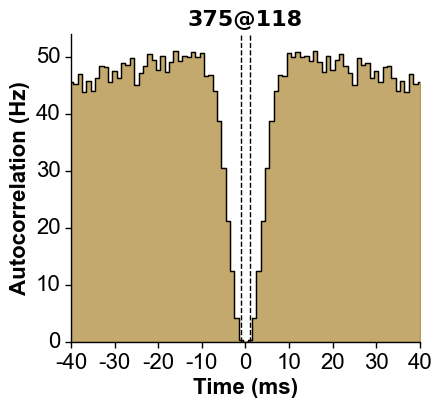

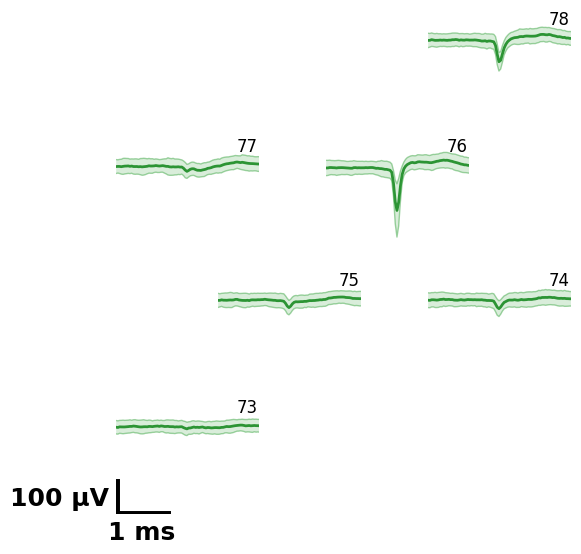

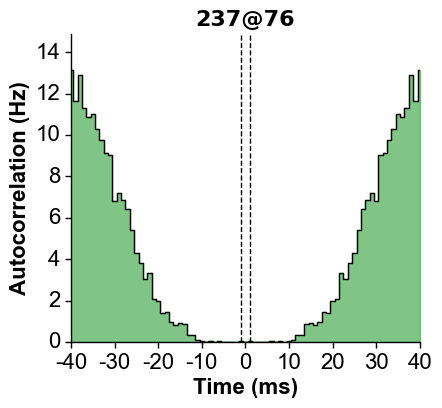

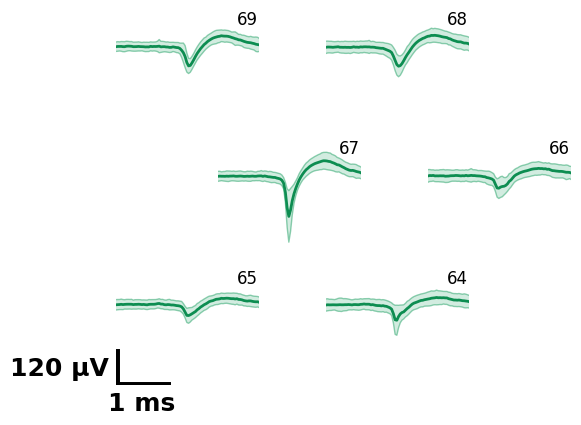

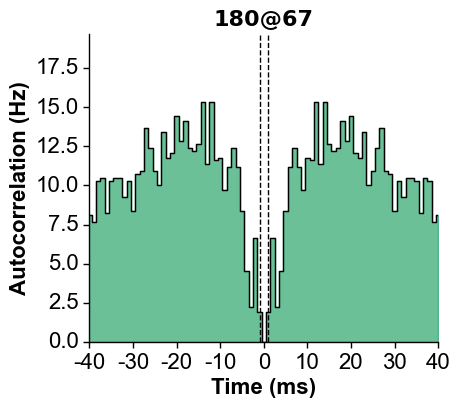

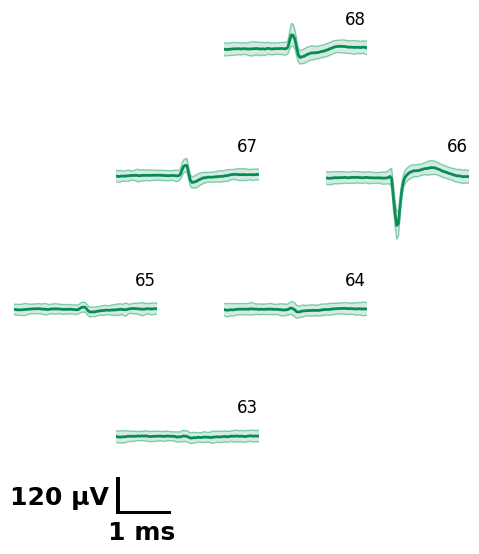

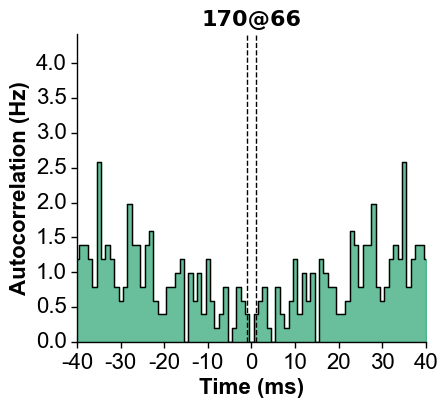

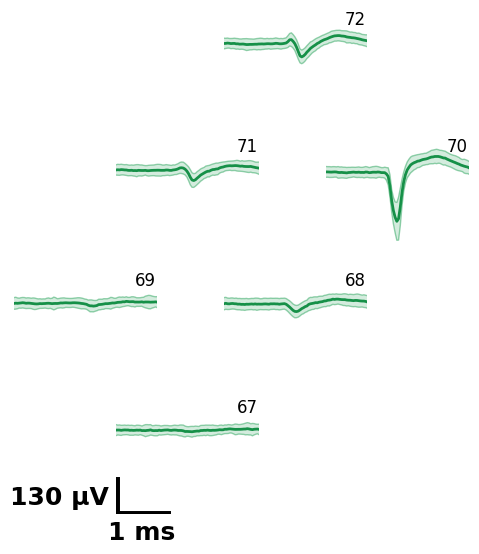

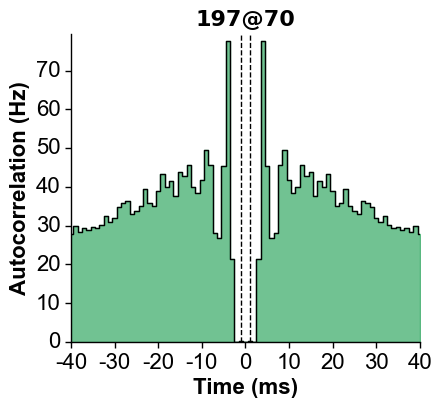

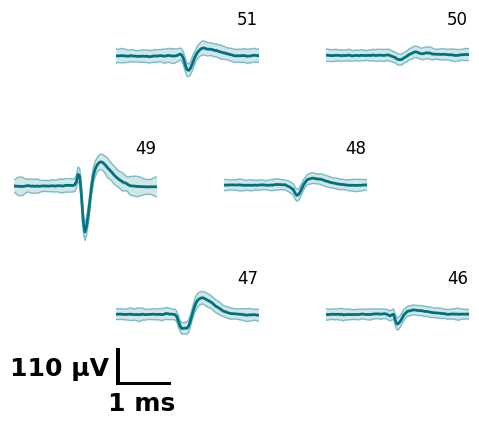

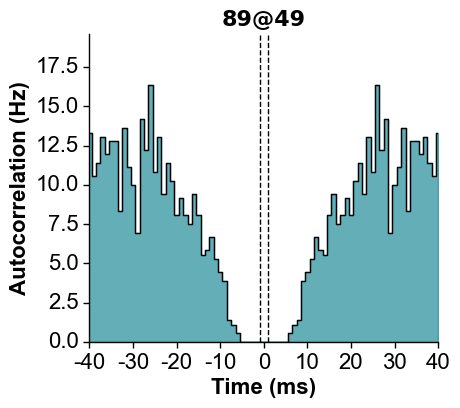

In [30]:
sorti = np.argsort(-good_cells_info.Amplitude).values
color_map = m.to_rgba(good_cells_info.ch) / 1.5

for i in range(24):
    fig = plot_wvf(dp, good_cells[sorti[i]], Nchannels=6, color=color_map[sorti[i]]);
    fig.savefig(f'./results/unit{sorti[i]:04d}_waveform.pdf')
    fig = plot_acg(dp, good_cells[sorti[i]], cbin=1, cwin=80, color=color_map[sorti[i]]);
    fig.savefig(f'./results/unit{sorti[i]:04d}_acg.pdf')
    print(sorti[i])


C:\Users\chris\AppData\Local\Temp\ipykernel_37344\2856513411.py:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax[0].scatter(c[1], y, n_units, color, alpha=alpha)


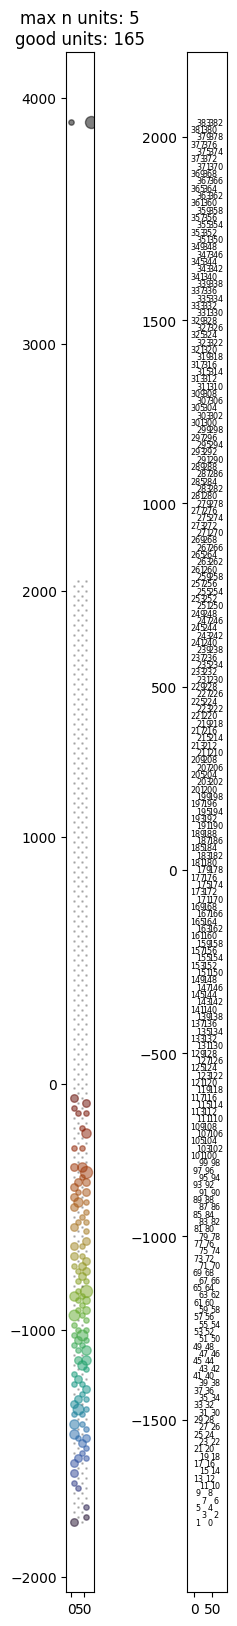

In [34]:
fig, ax = plt.subplots(1,2,figsize=(3,20))
color_map = m.to_rgba(np.vstack(channel_map)[:,0]) / 1.5

unit_size = []
scaler = 15
for c in channel_map:
    #n_units = len(clust_info[(clust_info.ch == c[0]) & (clust_info.KSLabel== 'good')])
    n_units = len(good_cells_info[(good_cells_info.ch == c[0])])
    unit_size.append(n_units)
    if n_units == 0:
        n_units = 1
        alpha = 0.2
        color = 'k'
    else:
        n_units = n_units * scaler
        alpha = 0.5
        color = color_map[c[0]]
    y = c[2]
    y = (c[2] - surface_depth)
    ax[0].scatter(c[1], y, n_units, color, alpha=alpha)
    ax[1].scatter(c[1], y, n_units, 'k', alpha=0)
    ax[1].text(c[1], y, c[0], fontsize='xx-small', ha='center', va='center')
ax[0].scatter(0, 3900, scaler, 'k', alpha=0.5)
ax[0].scatter(80, 3900, np.max(unit_size)*scaler, 'k', alpha=0.5)
ax[0].set_aspect('equal')
ax[0].set_xlim([-20, 90])
ax[0].set_title(f'max n units: {np.max(unit_size)}\ngood units: {np.sum(unit_size)}')
ax[1].set_aspect('equal')
ax[1].set_xlim([-20, 90])

fig.savefig('./results/channel_map.pdf', bbox_inches='tight', dpi=300)

